In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
import pysam
import statsmodels.api as sm
import statsmodels.formula.api as smf
import os
from scipy.fft import fft, fftfreq
from scipy.signal import find_peaks

In [2]:
ucsf = pd.DataFrame(pd.read_csv("./ucsf_fragment_lengths_redone.csv"))
uq = pd.DataFrame(pd.read_csv("./uq_fragment_lengths_redone.csv"))

In [3]:
uq['Fragment Size'].max()

459

In [10]:
ucsf['Fragment Size'].max()

457

In [4]:
clinical = pd.DataFrame(pd.read_csv("../als_cfdna_samples/combined_metadata_redone.csv"))
clinical = clinical[clinical['sample_type'] != 'bsctrl']

In [5]:
uq_clinical = clinical[clinical['cohort'] == 'uq']

uq['Sample'] = uq['Sample'].astype(int) + 96

uq_merged_df = pd.merge(uq, clinical[clinical['cohort'] == 'uq'], left_on='Sample', right_on='sample_num')

uq_merged_df = uq_merged_df.drop(columns=['Sample'])

In [6]:
ucsf_merged_df = pd.merge(ucsf, clinical[clinical['cohort'] == 'ucsf'], left_on='Sample', right_on='sample_num')

ucsf_merged_df = ucsf_merged_df.drop(columns=['Sample'])
merged_df = pd.concat([ucsf_merged_df, uq_merged_df])

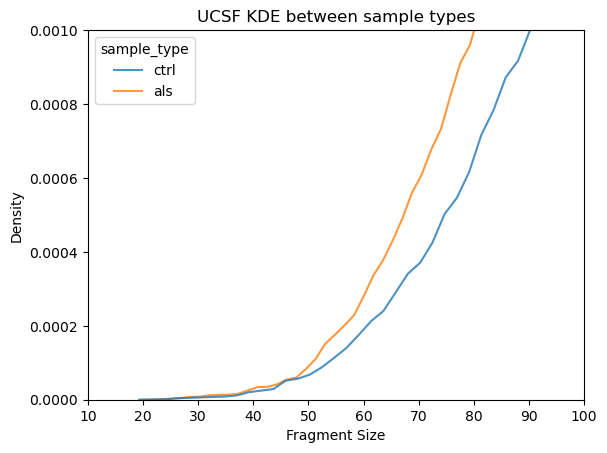

In [23]:
plt.figure()
sns.kdeplot(data=ucsf_merged_df, x='Fragment Size', hue='sample_type', fill=False, common_norm=False, bw_adjust=0.4, alpha=0.8)
# plt.axvline(x=151, color="red")
# plt.axvline(x=170, color="red")
plt.title("UCSF KDE between sample types")
plt.xlim(10,100)
plt.ylim(0,0.001)
#plt.savefig("ucsf_kde_smooth.png")
plt.show()

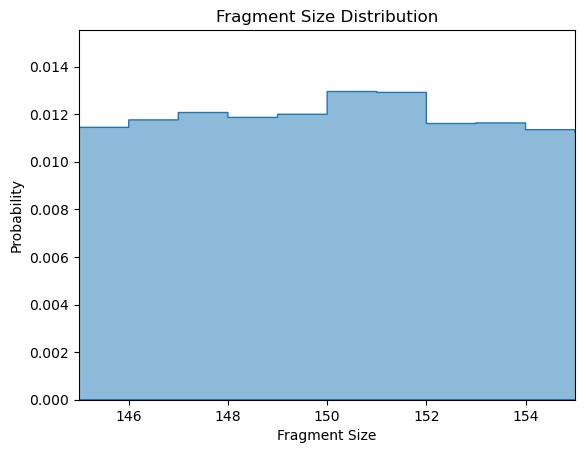

In [ ]:
plt.figure()
sns.histplot(data=merged_df, x='Fragment Size', element='step', binwidth=1, stat='probability', common_norm=False, alpha=0.5)
plt.title("Fragment Size Distribution")
#plt.savefig('overall_distribution_hi_res.png')
plt.xlim(145,155)
plt.show()

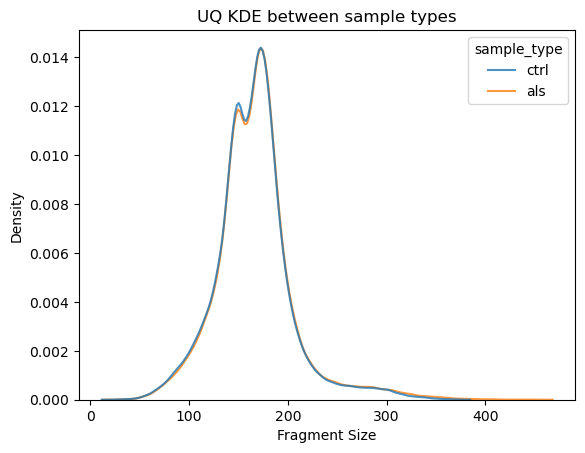

In [24]:
plt.figure()
sns.kdeplot(data=uq_merged_df, x='Fragment Size', hue='sample_type', fill=False, common_norm=False, alpha=0.8)
#plt.axvline(x=151, color="red")
plt.title("UQ KDE between sample types")
#plt.savefig("ucsf_kde_smooth.png")
plt.show()

ValueError: cannot reindex on an axis with duplicate labels

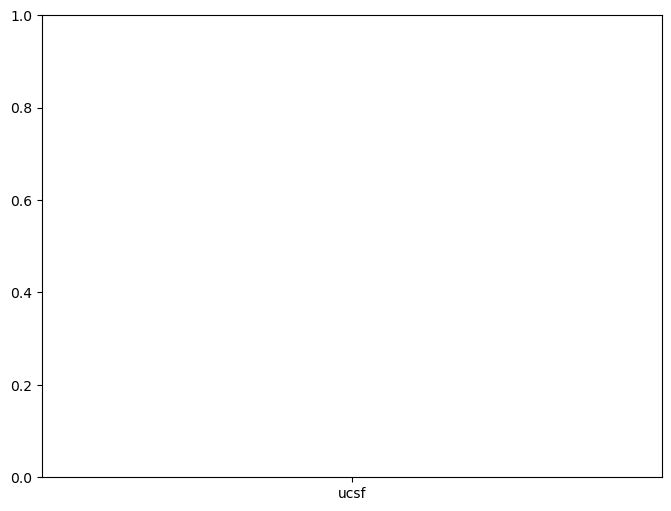

In [13]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=merged_df, x='cohort', y='mean_fl', hue='sample_type')
plt.title('Difference in fragment length by type')
plt.xlabel('Cohort')
plt.ylabel('Mean fragment length')
plt.show()

In [14]:
merged_df

,Fragment Size,sample_num,collection_ID,sample_type,sample_type_3,als_type,cohort,als_frs,als_frs_slope,age,...,concentration,plasma_volume,years_since_onset,input_cfdna,fvc,mt_reads,pre_otr,post_otr,mean_fl,median_fl
0,146,22,NaN,ctrl,ctrl,NaN,ucsf,NaN,NaN,62.0,...,114.5,8.0,NaN,18.320,NaN,235,2796674,244974,166.740517,168.0
1,194,22,NaN,ctrl,ctrl,NaN,ucsf,NaN,NaN,62.0,...,114.5,8.0,NaN,18.320,NaN,235,2796674,244974,166.740517,168.0
2,157,22,NaN,ctrl,ctrl,NaN,ucsf,NaN,NaN,62.0,...,114.5,8.0,NaN,18.320,NaN,235,2796674,244974,166.740517,168.0
3,144,22,NaN,ctrl,ctrl,NaN,ucsf,NaN,NaN,62.0,...,114.5,8.0,NaN,18.320,NaN,235,2796674,244974,166.740517,168.0
4,208,22,NaN,ctrl,ctrl,NaN,ucsf,NaN,NaN,62.0,...,114.5,8.0,NaN,18.320,NaN,235,2796674,244974,166.740517,168.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959995,185,192,7118495_11027052,ctrl,ond,NaN,uq,NaN,NaN,64.0,...,NaN,5.0,NaN,228.724,NaN,635,2523750,270576,167.070266,167.0
959996,94,192,7118495_11027052,ctrl,ond,NaN,uq,NaN,NaN,64.0,...,NaN,5.0,NaN,228.724,NaN,635,2523750,270576,167.070266,167.0
959997,144,192,7118495_11027052,ctrl,ond,NaN,uq,NaN,NaN,64.0,...,NaN,5.0,NaN,228.724,NaN,635,2523750,270576,167.070266,167.0
959998,204,192,7118495_11027052,ctrl,ond,NaN,uq,NaN,NaN,64.0,...,NaN,5.0,NaN,228.724,NaN,635,2523750,270576,167.070266,167.0
